# Import

We are using Qiskit library. We will run the circuit in local simulator.

In [28]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Quantum Circuit


### No. of qubits: 5
### No. of classical bits: 3

* We utilized three qubits to represent the cube's eight vertices and the remaining two for encoding the possible paths.
* We used 3 classical bits to store the measurement.

We apply the Hadamard gate to q3 and q4. Then we apply the cnot gate with target being q4 and control being q0. We apply not gate to q4. Then we apply the cnot gate with target being q1 and control being q4. We apply the cnot gate with target being q2 and control being q3. We apply the cnot gate with target being q1 and control being q3,q4. Then we apply not gate to q4. We apply the cnot gate with target being q0 and control being q3,q4. We apply not gate to q4. Then we apply the cnot gate with target being q2 and control being q3,q4. 

Finally, we measure the q0,q1,q2.

The circuit diagram is shown in the following section.



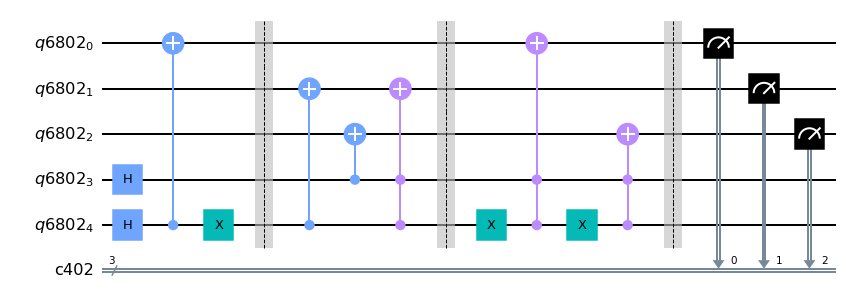

In [29]:

# Declare the qubits and classical bits

n_qubits = 5 
n_bits = 3 
qreg = QuantumRegister(n_qubits) 
creg = ClassicalRegister(n_bits)
qcircuit = QuantumCircuit(qreg, creg) 

# Create the quantum circuit 
# barrier is applied for the better visualization

qcircuit.h(qreg[3])
qcircuit.h(qreg[4])
qcircuit.cx(qreg[4], qreg[0])
qcircuit.x(qreg[4])

qcircuit.barrier()

qcircuit.cx(qreg[4], qreg[1])
qcircuit.cx(qreg[3], qreg[2])
qcircuit.ccx(qreg[4], qreg[3], qreg[1])

qcircuit.barrier()

qcircuit.x(qreg[4])
qcircuit.ccx(qreg[4], qreg[3], qreg[0])
qcircuit.x(qreg[4])
qcircuit.ccx(qreg[4], qreg[3], qreg[2])

qcircuit.barrier()

# Measure the bits
for i in range (3):
    qcircuit.measure(qreg[i], creg[i])

# Show the Quantum Circuit 
qcircuit.draw(output = 'mpl')


## Create the circuit in a method.

In [30]:
def qwalk_circuit(input_qubits):
    
    # Declare the qubits and classical bits
    qreg = QuantumRegister(5) 
    creg = ClassicalRegister(3)
    qcircuit = QuantumCircuit(qreg, creg) 
    
    for iteration, qubit in enumerate(input_qubits):
        if qubit == '1': # to probe the the possible nodes of the starting from a given node on the cube
            qcircuit.x(qreg[2-iteration]) # that is, input qubits for the next step of the walk

    # Create the quantum circuit 
    # barrier is applied for the better visualization
    
    qcircuit.h(qreg[3])
    qcircuit.h(qreg[4])    
    qcircuit.cx(qreg[4], qreg[0]) 
    qcircuit.x(qreg[4])

    qcircuit.barrier()

    qcircuit.cx(qreg[4], qreg[1])   
    qcircuit.cx(qreg[3], qreg[2])    
    qcircuit.ccx(qreg[4], qreg[3], qreg[1])
    
    qcircuit.barrier()
 
    qcircuit.x(qreg[4])
    qcircuit.ccx(qreg[4], qreg[3], qreg[0])  
    qcircuit.x(qreg[4])  
    qcircuit.ccx(qreg[4], qreg[3], qreg[2])

    qcircuit.barrier(range(3))

    # Measure the bits
    
    for i in range (3):
        qcircuit.measure(qreg[i], creg[i])
    
    return qcircuit    

## Transpilation is the process of reworking an input circuit to match the architecture of a specific quantum device and/or optimizing the circuit for execution on modern noisy quantum systems. Thus, we add the transpiler in our quantum circuit.

In [31]:
from qiskit.visualization import plot_histogram
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()




## Now we run the circuit 100 times to get all of the notes. We generate the histogram every 25th iteration to see which note is picked.

############################### Histogram for iteration: 25 ###############################



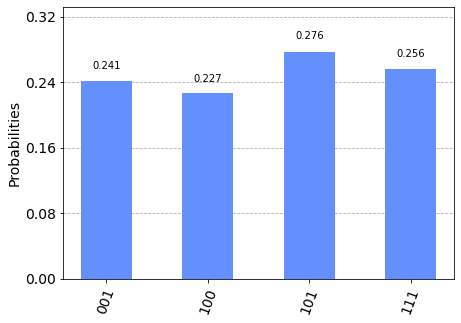



############################### Histogram for iteration: 50 ###############################



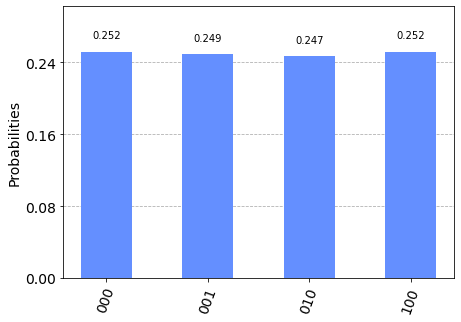



############################### Histogram for iteration: 75 ###############################



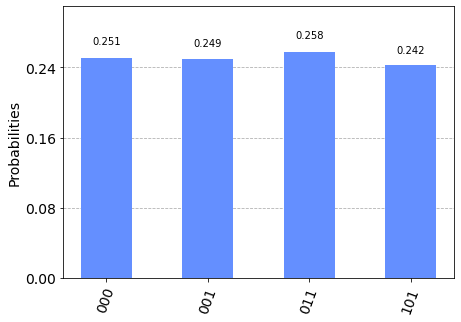



############################### Histogram for iteration: 100 ###############################



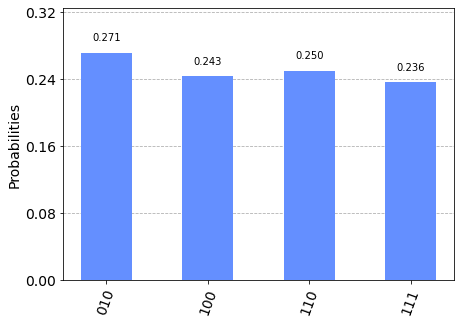

In [32]:

# initialization of the note
nodes = ['010']

counter = 100
modval = 25


for i in range (counter):
    qcircuit = qwalk_circuit(nodes[i])
   
    qcircuit_compiled = transpile(qcircuit, backend) 
    job = backend.run(qcircuit_compiled, shots = 1024)
    result = job.result()
    counts = result.get_counts(qcircuit_compiled)
    
    # We pick the note with the highest probability
    meas_nodes = max(counts, key=counts.get)
    nodes.append(meas_nodes)
    
    if (i+1)%modval==0:
        
        print('############################### Histogram for iteration: '+ str(i+1)+ ' ###############################')
        print()
   
        # Draw the histogram
        display(plot_histogram(counts))
        print()
        print()

In [33]:
# Show the nodes we got after the circuit execution.
print(nodes)


['010', '011', '010', '011', '010', '110', '111', '101', '001', '001', '011', '011', '011', '111', '110', '110', '010', '110', '100', '110', '100', '110', '100', '101', '101', '101', '101', '001', '011', '001', '101', '101', '100', '100', '110', '110', '110', '100', '110', '111', '111', '011', '111', '101', '111', '110', '110', '110', '100', '000', '100', '101', '101', '101', '001', '000', '100', '100', '000', '010', '011', '011', '111', '111', '101', '111', '101', '001', '011', '001', '101', '001', '101', '101', '001', '011', '001', '001', '000', '000', '000', '001', '101', '111', '111', '110', '111', '101', '101', '101', '101', '101', '101', '101', '100', '101', '100', '110', '110', '110', '010']


## Now we run the circuit 100 times to get all of the rythm. We generate the histogram every 25th iteration to see which rythm is picked.

############################### Histogram for iteration: 25 ###############################



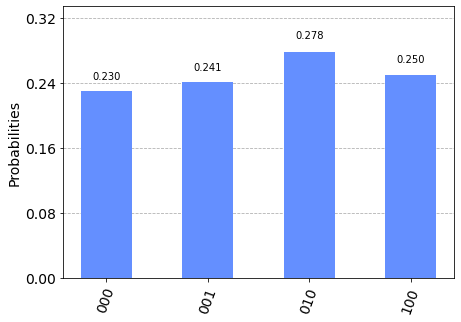



############################### Histogram for iteration: 50 ###############################



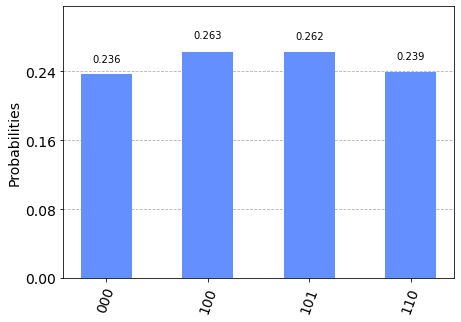



############################### Histogram for iteration: 75 ###############################



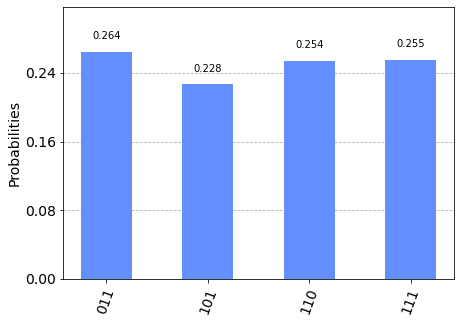



############################### Histogram for iteration: 100 ###############################



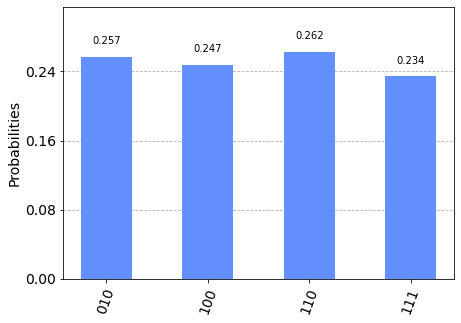

In [34]:
# initialization of the note
rythm = ['011']

counter = 100
modval = 25
for i in range (counter):
    
    qcircuit = qwalk_circuit(rythm[i])
    qcircuit_compiled = transpile(qcircuit, backend) 
    job = backend.run(qcircuit_compiled, shots = 1024)
    result = job.result()
    counts = result.get_counts(qcircuit_compiled)
    
    # We pick the note with the highest probability
    meas_rythm = max(counts, key=counts.get)
    rythm.append(meas_rythm)
    
    if (i+1)%modval==0:
    
        
        print('############################### Histogram for iteration: '+ str(i+1)+ ' ###############################')
        print()        

        # Draw the histogram
        display(plot_histogram(counts))
        print()
        print()

In [35]:
# Show the rythms we got after the circuit execution.
print(rythm)

['011', '010', '000', '100', '101', '001', '000', '100', '110', '110', '100', '000', '010', '011', '011', '001', '011', '001', '001', '101', '101', '101', '101', '001', '000', '010', '010', '010', '010', '000', '001', '101', '111', '101', '111', '110', '100', '100', '100', '100', '101', '101', '101', '100', '101', '100', '101', '101', '100', '100', '100', '110', '110', '100', '100', '101', '111', '111', '101', '111', '110', '100', '000', '100', '110', '111', '011', '011', '010', '010', '011', '010', '110', '110', '111', '011', '111', '111', '110', '111', '011', '010', '000', '000', '001', '101', '111', '110', '100', '101', '100', '000', '010', '000', '010', '110', '111', '101', '111', '110', '110']


## MIDIUtil is a pure Python module that allows us to create multi-track audio files.

In [36]:
# !pip install MIDIutil


In [37]:
# Define the duratin

notes_MIDI_num_dic = {'000':64, '001':68, '010':80, '011':85, '100':90, '101':101, '110':121, '111':128}
rythm_value_dic = {'000':0.7, '001':3, '010':2, '011':1.5, '100':1, '101':0.75, '110':0.5, '111':0.25}


### Now we attach a MIDI number to all of the created notes and rhythms.

In [38]:

final_note = []
final_rythm = []
for i in nodes:
    final_note.append(notes_MIDI_num_dic[i]) 

for i in rythm:
    final_rythm.append(rythm_value_dic[i])

Define the MIDI file properties

In [39]:
from midiutil import MIDIFile

track    = 0
channel  = 3
time     = 0   
duration = 1   
tempo    = 500  
volume   = 100

#### Finally, create the MIDI file from notes and rythms and store as a file.

In [40]:
MyMIDI = MIDIFile(1) 
MyMIDI.addTempo(track,time, tempo)

for pitch, duration in zip(final_note, final_rythm):
    MyMIDI.addNote(track, channel, pitch, time, duration, volume)
    MyMIDI.addNote(track, channel, pitch-5, time, duration, volume)
    MyMIDI.addNote(track, channel, pitch-7, time, duration, volume) 
    MyMIDI.addNote(track, channel, pitch-12, time, duration, volume)
    MyMIDI.addNote(track, channel, pitch+5, time, duration, volume)
    MyMIDI.addNote(track, channel, pitch+7, time, duration, volume)
    MyMIDI.addNote(track, channel, pitch+12, time, duration, volume)
    time = duration + time + 0.25
    

with open("Quantune2.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)